In [1]:
import pandas as pd
import numpy as np
import collections
import sys
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import linear_model
from sklearn import svm
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
import csv
%matplotlib inline

In [2]:
## Read in dataframes 
data_dir = './DataFiles_2018/'
# This file provides a master list of cities that have been locations for games played.
df_cities = pd.read_csv(data_dir + 'Cities.csv')
df_conferences = pd.read_csv(data_dir + 'Conferences.csv')
df_conferencetourney = pd.read_csv(data_dir + 'ConferenceTourneyGames.csv')
df_gamecities = pd.read_csv(data_dir + 'GameCities.csv')
df_tourneycompact = pd.read_csv(data_dir + 'NCAATourneyCompactResults.csv')
df_tourneydetailed = pd.read_csv(data_dir + 'NCAATourneyDetailedResults.csv')
df_tourneyseedroundslots = pd.read_csv(data_dir + 'NCAATourneySeedRoundSlots.csv')
df_tourneyseeds = pd.read_csv(data_dir + 'NCAATourneySeeds.csv')
df_tourneyslots = pd.read_csv(data_dir + 'NCAATourneySlots.csv')
df_seasoncompact = pd.read_csv(data_dir + 'RegularSeasonCompactResults.csv')
df_seasondetailed = pd.read_csv(data_dir + 'RegularSeasonDetailedResults.csv')
df_seasons = pd.read_csv(data_dir + 'Seasons.csv')
df_secondtourneycompact = pd.read_csv(data_dir + 'SecondaryTourneyCompactResults.csv')
df_coaches = pd.read_csv(data_dir + 'TeamCoaches.csv')
df_teamconferences = pd.read_csv(data_dir + 'TeamConferences.csv')
df_teams = pd.read_csv(data_dir + 'Teams.csv')
#df_teamspellings = pd.read_csv(data_dir + 'TeamSpellings.csv') #utf-8 encoding issue
df_ordinals = pd.read_csv('MasseyOrdinals_thruSeason2018_Day128.csv')

df_teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2018
1,1102,Air Force,1985,2018
2,1103,Akron,1985,2018
3,1104,Alabama,1985,2018
4,1105,Alabama A&M,2000,2018


In [3]:
def handleDifferentCSV(df):
    # The stats CSV is a lit different in terms of naming so below is just some data cleaning
    df['School'] = df['School'].replace('(State)', 'St', regex=True) 
    df['School'] = df['School'].replace('Albany (NY)', 'Albany NY') 
    df['School'] = df['School'].replace('Boston University', 'Boston Univ')
    df['School'] = df['School'].replace('Central Michigan', 'C Michigan')
    df['School'] = df['School'].replace('(Eastern)', 'E', regex=True)
    df['School'] = df['School'].replace('Louisiana St', 'LSU')
    df['School'] = df['School'].replace('North Carolina St', 'NC State')
    df['School'] = df['School'].replace('Southern California', 'USC')
    df['School'] = df['School'].replace('University of California', 'California', regex=True) 
    df['School'] = df['School'].replace('American', 'American Univ')
    df['School'] = df['School'].replace('Arkansas-Little Rock', 'Ark Little Rock')
    df['School'] = df['School'].replace('Arkansas-Pine Bluff', 'Ark Pine Bluff')
    df['School'] = df['School'].replace('Bowling Green St', 'Bowling Green')
    df['School'] = df['School'].replace('Brigham Young', 'BYU')
    df['School'] = df['School'].replace('Cal Poly', 'Cal Poly SLO')
    df['School'] = df['School'].replace('Centenary (LA)', 'Centenary')
    df['School'] = df['School'].replace('Central Connecticut St', 'Central Conn')
    df['School'] = df['School'].replace('Charleston Southern', 'Charleston So')
    df['School'] = df['School'].replace('Coastal Carolina', 'Coastal Car')
    df['School'] = df['School'].replace('College of Charleston', 'Col Charleston')
    df['School'] = df['School'].replace('Cal St Fullerton', 'CS Fullerton')
    df['School'] = df['School'].replace('Cal St Sacramento', 'CS Sacramento')
    df['School'] = df['School'].replace('Cal St Bakersfield', 'CS Bakersfield')
    df['School'] = df['School'].replace('Cal St Northridge', 'CS Northridge')
    df['School'] = df['School'].replace('East Tennessee St', 'ETSU')
    df['School'] = df['School'].replace('Detroit Mercy', 'Detroit')
    df['School'] = df['School'].replace('Fairleigh Dickinson', 'F Dickinson')
    df['School'] = df['School'].replace('Florida Atlantic', 'FL Atlantic')
    df['School'] = df['School'].replace('Florida Gulf Coast', 'FL Gulf Coast')
    df['School'] = df['School'].replace('Florida International', 'Florida Intl')
    df['School'] = df['School'].replace('George Washington', 'G Washington')
    df['School'] = df['School'].replace('Georgia Southern', 'Ga Southern')
    df['School'] = df['School'].replace('Gardner-Webb', 'Gardner Webb')
    df['School'] = df['School'].replace('Illinois-Chicago', 'IL Chicago')
    df['School'] = df['School'].replace('Kent St', 'Kent')
    df['School'] = df['School'].replace('Long Island University', 'Long Island')
    df['School'] = df['School'].replace('Loyola Marymount', 'Loy Marymount')
    df['School'] = df['School'].replace('Loyola (MD)', 'Loyola MD')
    df['School'] = df['School'].replace('Loyola (IL)', 'Loyola-Chicago')
    df['School'] = df['School'].replace('Massachusetts', 'MA Lowell')
    df['School'] = df['School'].replace('Maryland-Eastern Shore', 'MD E Shore')
    df['School'] = df['School'].replace('Miami (FL)', 'Miami FL')
    df['School'] = df['School'].replace('Miami (OH)', 'Miami OH')
    df['School'] = df['School'].replace('Missouri-Kansas City', 'Missouri KC')
    df['School'] = df['School'].replace('Monmouth', 'Monmouth NJ')
    df['School'] = df['School'].replace('Mississippi Valley St', 'MS Valley St')
    df['School'] = df['School'].replace('Montana St', 'MTSU')
    df['School'] = df['School'].replace('Northern Colorado', 'N Colorado')
    df['School'] = df['School'].replace('North Dakota St', 'N Dakota St')
    df['School'] = df['School'].replace('Northern Illinois', 'N Illinois')
    df['School'] = df['School'].replace('Northern Kentucky', 'N Kentucky')
    df['School'] = df['School'].replace('North Carolina A&T', 'NC A&T')
    df['School'] = df['School'].replace('North Carolina Central', 'NC Central')
    df['School'] = df['School'].replace('Pennsylvania', 'Penn')
    df['School'] = df['School'].replace('South Carolina St', 'S Carolina St')
    df['School'] = df['School'].replace('Southern Illinois', 'S Illinois')
    df['School'] = df['School'].replace('UC-Santa Barbara', 'Santa Barbara')
    df['School'] = df['School'].replace('Southeastern Louisiana', 'SE Louisiana')
    df['School'] = df['School'].replace('Southeast Missouri St', 'SE Missouri St')
    df['School'] = df['School'].replace('Stephen F. Austin', 'SF Austin')
    df['School'] = df['School'].replace('Southern Methodist', 'SMU')
    df['School'] = df['School'].replace('Southern Mississippi', 'Southern Miss')
    df['School'] = df['School'].replace('Southern', 'Southern Univ')
    df['School'] = df['School'].replace('St. Bonaventure', 'St Bonaventure')
    df['School'] = df['School'].replace('St. Francis (NY)', 'St Francis NY')
    df['School'] = df['School'].replace('Saint Francis (PA)', 'St Francis PA')
    df['School'] = df['School'].replace('St. John\'s (NY)', 'St John\'s')
    df['School'] = df['School'].replace('Saint Joseph\'s', 'St Joseph\'s PA')
    df['School'] = df['School'].replace('Saint Louis', 'St Louis')
    df['School'] = df['School'].replace('Saint Mary\'s (CA)', 'St Mary\'s CA')
    df['School'] = df['School'].replace('Mount Saint Mary\'s', 'Mt St Mary\'s')
    df['School'] = df['School'].replace('Saint Peter\'s', 'St Peter\'s')
    df['School'] = df['School'].replace('Texas A&M-Corpus Christian', 'TAM C. Christian')
    df['School'] = df['School'].replace('Texas Christian', 'TCU')
    df['School'] = df['School'].replace('Tennessee-Martin', 'TN Martin')
    df['School'] = df['School'].replace('Texas-Rio Grande Valley', 'UTRGV')
    df['School'] = df['School'].replace('Texas Southern', 'TX Southern')
    df['School'] = df['School'].replace('Alabama-Birmingham', 'UAB')
    df['School'] = df['School'].replace('UC-Davis', 'UC Davis')
    df['School'] = df['School'].replace('UC-Irvine', 'UC Irvine')
    df['School'] = df['School'].replace('UC-Riverside', 'UC Riverside')
    df['School'] = df['School'].replace('Central Florida', 'UCF')
    df['School'] = df['School'].replace('Louisiana-Lafayette', 'ULL')
    df['School'] = df['School'].replace('Louisiana-Monroe', 'ULM')
    df['School'] = df['School'].replace('Maryland-Baltimore County', 'UMBC')
    df['School'] = df['School'].replace('North Carolina-Asheville', 'UNC Asheville')
    df['School'] = df['School'].replace('North Carolina-Greensboro', 'UNC Greensboro')
    df['School'] = df['School'].replace('North Carolina-Wilmington', 'UNC Wilmington')
    df['School'] = df['School'].replace('Nevada-Las Vegas', 'UNLV')
    df['School'] = df['School'].replace('Texas-Arlington', 'UT Arlington')
    df['School'] = df['School'].replace('Texas-San Antonio', 'UT San Antonio')
    df['School'] = df['School'].replace('Texas-El Paso', 'UTEP')
    df['School'] = df['School'].replace('Virginia Commonwealth', 'VA Commonwealth')
    df['School'] = df['School'].replace('Western Carolina', 'W Carolina')
    df['School'] = df['School'].replace('Western Illinois', 'W Illinois')
    df['School'] = df['School'].replace('Western Kentucky', 'WKU')
    df['School'] = df['School'].replace('Western Michigan', 'W Michigan')
    df['School'] = df['School'].replace('Abilene Christian', 'Abilene Chr')
    df['School'] = df['School'].replace('Montana State', 'Montana St')
    df['School'] = df['School'].replace('Central Arkansas', 'Cent Arkansas')
    df['School'] = df['School'].replace('Houston Baptist', 'Houston Bap')
    df['School'] = df['School'].replace('South Dakota St', 'S Dakota St')
    df['School'] = df['School'].replace('Maryland-Eastern Shore', 'MD E Shore')
    return df

In [4]:
def getTeamName(team_id):
    return df_teams[df_teams['TeamID'] == team_id].values[0][1]
getTeamName(1200)

'Fordham'

In [5]:
#df_ordinals['SystemName'].value_counts()

In [6]:
df_team_year = df_ordinals[(df_ordinals['Season']==2016) & (df_ordinals['TeamID']==1246)]
sag_ranks = df_team_year[df_team_year['SystemName']=='POM']['OrdinalRank']
np.average(sag_ranks[-4:])

8.5

In [23]:
def getSeasonData(team_id, year):
    # Getting ordinal data
    df_ordinalyearteam = df_ordinals[(df_ordinals['Season']==year) & (df_ordinals['TeamID']==team_id)]
    
    # The data frame below holds stats for every single game in the given year
    df_year = df_seasondetailed[df_seasondetailed['Season'] == year]
    
    df_stats_SOS = pd.read_csv('./RegSeasonStats/MMStats_'+str(year)+'.csv')
    df_stats_SOS = handleDifferentCSV(df_stats_SOS)
    df_ratings = pd.read_csv('./RatingStats/RatingStats_'+str(year)+'.csv')
    df_ratings = handleDifferentCSV(df_ratings)
    
    name = getTeamName(team_id)
    team = df_stats_SOS[df_stats_SOS['School'] == name]
    team_rating = df_ratings[df_ratings['School'] == name]
    
    
    # Finding number of points per game
    gamesWon = df_year[df_year.WTeamID == team_id] 
    totalPoints = gamesWon['WScore'].sum()
    gamesLost = df_year[df_year.LTeamID == team_id] 
    totalGames = gamesWon.append(gamesLost)
    numGames = len(totalGames.index)
    totalPoints += gamesLost['LScore'].sum()
    
    # Finding number of points per game allowed
    totalPointsAllowed = gamesWon['LScore'].sum()
    totalPointsAllowed += gamesLost['WScore'].sum()
    
    #FGM - field goals made
    totalFGM = gamesWon['WFGM'].sum()
    totalFGM += gamesLost['LFGM'].sum()
    
    #FGM - field goals made (by opponent)
    totalOppFGM = gamesWon['LFGM'].sum()
    totalOppFGM += gamesLost['WFGM'].sum()
    
    #FGA - field goals attempted
    totalFGA = gamesWon['WFGA'].sum()
    totalFGA += gamesLost['LFGA'].sum()
    
    #FGA - field goals attempted (by opponent)
    totalOppFGA = gamesWon['LFGA'].sum()
    totalOppFGA += gamesLost['WFGA'].sum()
    
    #FGM3 - three pointers made
    totalFGM3 = gamesWon['WFGM3'].sum()
    totalFGM3 += gamesLost['LFGM3'].sum()
    
    #FGM3 - three pointers made (by opponent)
    totalOppFGM3 = gamesWon['LFGM3'].sum()
    totalOppFGM3 += gamesLost['WFGM3'].sum()
    
    #FGA3 - three pointers attempted
    totalFGA3 = gamesWon['WFGA3'].sum()
    totalFGA3 += gamesLost['LFGA3'].sum()
    
    #FGA3 - three pointers attempted (by opponent)
    totalOppFGA3 = gamesWon['LFGA3'].sum()
    totalOppFGA3 += gamesLost['WFGA3'].sum()
    
    #FTM - free throws made
    totalFTM = gamesWon['WFTM'].sum()
    totalFTM += gamesLost['LFTM'].sum()
    
    #FTM - free throws made (by opponent)
    totalOppFTM = gamesWon['LFTM'].sum()
    totalOppFTM += gamesLost['WFTM'].sum()
    
    #FTA - free throws attempted
    totalFTA = gamesWon['WFTA'].sum()
    totalFTA += gamesLost['LFTA'].sum()
    
    #FTA - free throws attempted (by opponent)
    totalOppFTA = gamesWon['LFTA'].sum()
    totalOppFTA += gamesLost['WFTA'].sum()
    
    #OR - offensive rebounds
    totalOR = gamesWon['WOR'].sum()
    totalOR += gamesLost['LOR'].sum()
    
    #OR - offensive rebounds (by opponent)
    totalOppOR = gamesWon['LOR'].sum()
    totalOppOR += gamesLost['WOR'].sum()
    
    #DR - defensive rebounds
    totalDR = gamesWon['WDR'].sum()
    totalDR += gamesLost['LDR'].sum()
    
    #DR - defensive rebounds (by opponent)
    totalOppDR = gamesWon['LDR'].sum()
    totalOppDR += gamesLost['WDR'].sum()
    
    #Ast - assists
    totalAst = gamesWon['WAst'].sum()
    totalAst += gamesLost['LAst'].sum()
    
    #Ast - assists (by opponent)
    totalOppAst = gamesWon['LAst'].sum()
    totalOppAst += gamesLost['WAst'].sum()
    
    #TO - turnovers committed
    totalTO = gamesWon['WTO'].sum()
    totalTO += gamesLost['LTO'].sum()
    
    #TO - turnovers committed (by opponent)
    totalOppTO = gamesWon['LTO'].sum()
    totalOppTO += gamesLost['WTO'].sum()
    
    #Stl - steals
    totalStl = gamesWon['WStl'].sum()
    totalStl += gamesLost['LStl'].sum()
    
    #Stl - steals (by opponent)
    totalOppStl = gamesWon['LStl'].sum()
    totalOppStl += gamesLost['WStl'].sum()
    
    #Blk - blocks
    totalBlk = gamesWon['WBlk'].sum()
    totalBlk += gamesLost['LBlk'].sum()
    
    #Blk - blocks (by opponent)
    totalOppBlk = gamesWon['LBlk'].sum()
    totalOppBlk += gamesLost['WBlk'].sum()
    
    #PF - personal fouls committed
    totalPF = gamesWon['WPF'].sum()
    totalPF += gamesLost['LPF'].sum()
    
    #PF - personal fouls committed (by opponent)
    totalOppPF = gamesWon['LPF'].sum()
    totalOppPF += gamesLost['WPF'].sum()
    
    #Finding tournament seed for that year
    tourneyYear = df_tourneyseeds[df_tourneyseeds['Season'] == year]
    seed = tourneyYear[tourneyYear['TeamID'] == team_id]
    if (len(seed.index) != 0):
        seed = seed.values[0][1]
        tournamentSeed = int(seed[1:3])
    else:
        tournamentSeed = 25
    
    # Finding number of wins and losses
    numWins = len(gamesWon.index)
    
    # Creating averages
    if numGames == 0 or len(team_rating.index) == 0:
        avgPoints = 0
        avgPointsAllowed = 0    
        avgFGM = 0
        avgOppFGM = 0
        avgFGA = 0
        avgOppFGA = 0
        avgFGM3 = 0
        avgOppFGM3 = 0
        avgFGA3 = 0
        avgOppFGA3 = 0
        avgFTM = 0
        avgOppFTM = 0
        avgFTA = 0
        avgOppFTA = 0
        avgOR = 0
        avgOppOR = 0
        avgDR = 0
        avgOppDR = 0
        avgAst = 0
        avgOppAst = 0
        avgTO = 0
        avgOppTO = 0
        avgStl = 0
        avgOppStl = 0
        avgBlk = 0
        avgOppBlk = 0
        avgPF = 0
        avgOppPF = 0
        tournamentSeed = 0
        sos = 0
        srs = 0
        sag = 0
        pom = 0
    else:
        avgPoints = totalPoints/numGames
        avgPointsAllowed = totalPointsAllowed/numGames
        avgFGM = totalFGM/numGames
        avgOppFGM = totalOppFGM/numGames
        avgFGA = totalFGA/numGames
        avgOppFGA = totalOppFGA/numGames
        avgFGM3 = totalFGM3/numGames
        avgOppFGM3 = totalOppFGM3/numGames
        avgFGA3 = totalFGA3/numGames
        avgOppFGA3 = totalOppFGA3/numGames
        avgFTM = totalFTM/numGames
        avgOppFTM = totalOppFTM/numGames
        avgFTA = totalFTA/numGames
        avgOppFTA = totalOppFTA/numGames
        avgOR = totalOR/numGames
        avgOppOR = totalOppOR/numGames
        avgDR = totalDR/numGames
        avgOppDR = totalOppDR/numGames
        avgAst = totalAst/numGames
        avgOppAst = totalOppAst/numGames
        avgTO = totalTO/numGames
        avgOppTO = totalOppTO/numGames
        avgStl = totalStl/numGames
        avgOppStl = totalOppStl/numGames
        avgBlk = totalBlk/numGames
        avgOppBlk = totalOppBlk/numGames
        avgPF = totalPF/numGames
        avgOppPF = totalOppPF/numGames
        sos = team['SOS'].values[0]
        srs = team['SRS'].values[0]
        
        sag_ranks = df_ordinalyearteam[df_ordinalyearteam['SystemName']=='SAG']['OrdinalRank']
        pom_ranks = df_ordinalyearteam[df_ordinalyearteam['SystemName']=='POM']['OrdinalRank']
        
        sag = np.average(sag_ranks[:]) 
        pom = np.average(pom_ranks[:])
    
    return [numWins, avgPoints, avgPointsAllowed, avgFGM, avgOppFGM, avgFGA, avgOppFGA, avgFGM3, avgOppFGM3, avgFGA3, avgOppFGA3,
            avgFTM, avgOppFTM, avgFTA, avgOppFTA, avgOR, avgOppOR, avgDR, avgOppDR, avgAst, avgOppAst, avgTO, avgOppTO, avgStl,
            avgOppStl, avgBlk, avgOppBlk, avgPF, avgOppPF, tournamentSeed, sos, srs, sag, pom]
    

In [24]:
def createSeasonDict(year):
    teamList = df_teams['TeamName'].tolist()
    seasonDictionary = collections.defaultdict(list)
    for team in teamList:
        team_id = df_teams[df_teams['TeamName'] == team].values[0][0]
        team_vector = getSeasonData(team_id, year)
        seasonDictionary[team_id] = team_vector
    return seasonDictionary

In [25]:
#Data2016 = createSeasonDict(2016)

In [26]:
#Data2016

In [27]:
def getHomeStat(row):
    if (row == 'H'):
        home = 1
    if (row == 'A'):
        home = -1
    if (row == 'N'):
        home = 0
    return home

In [28]:
def createTrainingSet(years):
    totalNumGames = 0
    for year in years:
        season = df_seasoncompact[df_seasoncompact['Season'] == year]
        totalNumGames += len(season.index)
        tourney = df_tourneycompact[df_tourneycompact['Season'] == year]
        totalNumGames += len(tourney.index)
    numFeatures = len(getSeasonData(1246,2010))
    xTrain=[]
    yTrain=[]
    indexCounter = 0
    for year in years:
        team_vectors = createSeasonDict(year)
        season = df_seasoncompact[df_seasoncompact['Season'] == year]
        numGamesInSeason = len(season.index)
        tourney = df_tourneycompact[df_tourneycompact['Season'] == year]
        numGamesInSeason += len(tourney.index)
        xTrainSeason = []
        yTrainSeason = []
        counter = 0
        for index, row in season.iterrows():
            w_team = row['WTeamID']
            w_vector = team_vectors[w_team]
            if all([x == 0 for x in w_vector]):
                continue
            l_team = row['LTeamID']
            l_vector = team_vectors[l_team]
            diff = [a - b for a, b in zip(w_vector, l_vector)]
            home = getHomeStat(row['WLoc'])
            if (counter % 2 == 0):
                diff.append(home) 
                xTrainSeason.append(diff)
                yTrainSeason.append(1)
            else:
                diff.append(-home)
                xTrainSeason.append([-p for p in diff])
                yTrainSeason.append(0)
            counter += 1
        for index, row in tourney.iterrows():
            w_team = row['WTeamID']
            w_vector = team_vectors[w_team]
            if all([x == 0 for x in w_vector]):
                continue
            l_team = row['LTeamID']
            l_vector = team_vectors[l_team]
            diff = [a - b for a, b in zip(w_vector, l_vector)]
            home = 0 #All tournament games are neutral
            if (counter % 2 == 0):
                diff.append(home) 
                xTrainSeason.append(diff)
                yTrainSeason.append(1)
            else:
                diff.append(-home)
                xTrainSeason.append([-p for p in diff])
                yTrainSeason.append(0)
            counter += 1
        xTrain[indexCounter:numGamesInSeason+indexCounter] = xTrainSeason
        yTrain[indexCounter:numGamesInSeason+indexCounter] = yTrainSeason
        indexCounter += numGamesInSeason
    xTrain = np.array(xTrain)
    yTrain = np.array(yTrain)
    return xTrain, yTrain

In [29]:
years = range(2003,2019)
xTrain2, yTrain2 = createTrainingSet(years)
#np.save('xTrain2018', xTrain)
#np.save('yTrain2018', yTrain)

In [30]:
xTrain2.shape, yTrain2.shape
#test1 = pd.DataFrame(xTrain2018)
#test1.head(100)

((83022, 35), (83022,))

In [31]:
#df_seasoncompact[df_seasoncompact['Season'] == 2018]

## Prelim Model Work

In [85]:
model4 = RandomForestClassifier(n_estimators=200)
model2 = linear_model.BayesianRidge()
model5 = AdaBoostClassifier(n_estimators=100)
model = GradientBoostingRegressor(n_estimators=100)
model3 = KNeighborsClassifier(n_neighbors=101)

In [86]:
def showFeatureImportance(my_categories):
    fx_imp = pd.Series(model.feature_importances_, index=my_categories)
    fx_imp /= fx_imp.max()
    fx_imp.sort()
    fx_imp.plot(kind='barh')

In [87]:
def showDependency(predictions, test, stat, my_categories):
    difference = test[:,my_categories.index(stat)]
    plt.scatter(difference, predictions)
    plt.ylabel('Probability of Team 1 Win')
    plt.xlabel(stat + ' Difference (Team 1 - Team 2)')
    plt.show()

In [88]:
categories = ['numWins', 'avgPoints', 'avgPointsAllowed', 'avgFGM', 'avgOppFGM', 'avgFGA', 'avgOppFGA', 'avgFGM3', 'avgOppFGM3', 'avgFGA3', 'avgOppFGA3',
            'avgFTM', 'avgOppFTM', 'avgFTA', 'avgOppFTA', 'avgOR', 'avgOppOR', 'avgDR', 'avgOppDR', 'avgAst', 'avgOppAst', 'avgTO', 'avgOppTO', 'avgStl',
            'avgOppStl', 'avgBlk', 'avgOppBlk', 'avgPF', 'avgOppPF', 'tournamentSeed', 'sos', 'srs', 'sag', 'pom', 'location']
accuracy=[]
totals=[]
for i in range(1):
    X_train, X_test, Y_train, Y_test = train_test_split(xTrain2018, yTrain2018)
    results1 = model.fit(X_train, Y_train)
    preds1 = model.predict(X_test)
    
    results2 = model2.fit(X_train, Y_train)
    preds2 = model2.predict(X_test)
    
    results3 = model3.fit(X_train, Y_train)
    preds3 = model3.predict(X_test)

    results4 = model4.fit(X_train, Y_train)
    preds4 = model4.predict(X_test)
    
    results5 = model5.fit(X_train, Y_train)
    preds5 = model5.predict(X_test)
    
    preds = (preds1 + preds2 + preds3 + preds4 + preds5)/5
    totals.append(preds)
    preds[preds < .5] = 0
    preds[preds >= .5] = 1
    accuracy.append(np.mean(preds == Y_test))
    #accuracy.append(np.mean(predictions == Y_test))
print("The accuracy is: ", sum(accuracy)/len(accuracy))

The accuracy is:  0.756648679899788


/home/aksan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


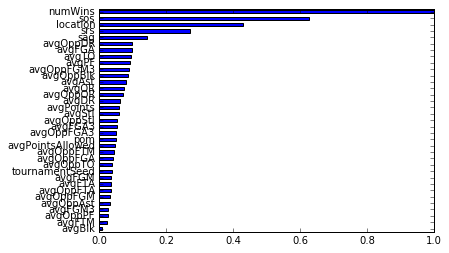

In [89]:
showFeatureImportance(categories)

In [32]:
#X_train, X_test, Y_train, Y_test = train_test_split(xTrain2018, yTrain2018)

gb = GradientBoostingClassifier()
params = {'n_estimators': np.arange(10,150,10), 'max_depth': np.arange(1,5,1)}
clf = GridSearchCV(gb, params, scoring='neg_log_loss', refit=True)
clf.fit(xTrain2, yTrain2)
print('Best log_loss: {:.4}, with best num_estimators: {} and best max_depth: {}'.format(clf.best_score_, clf.best_params_['n_estimators'], clf.best_params_['max_depth']))


Best log_loss: -0.4747, with best num_estimators: 120 and best max_depth: 4


In [94]:
#-.4751
print('Best log_loss: {:.4}, with best num_estimators: {} and best max_depth: {}'.format(clf3.best_score_, clf3.best_params_['n_estimators'], clf3.best_params_['max_depth']))

Best log_loss: -0.4765, with best num_estimators: 70 and best max_depth: 4


## Prediction for 2018 Submission

In [33]:
def predictGame(team_1_vector, team_2_vector, home):
    diff = [a - b for a, b in zip(team_1_vector, team_2_vector)]
    diff.append(home)
    #return model.predict([diff]) 
    return clf.predict_proba([diff])

In [34]:
# Test
team1_name = 'North Carolina' #1314
team2_name = 'Villanova' #1437
team1_vector = getSeasonData(df_teams[df_teams['TeamName'] == team1_name].values[0][0], 2016)
team2_vector = getSeasonData(df_teams[df_teams['TeamName'] == team2_name].values[0][0], 2016)
print('Probability that ' + team1_name + ' wins:', predictGame(team1_vector, team2_vector, 0))
#team1_vector
#team2_vector
diff = [a - b for a, b in zip(team1_vector, team2_vector)]
diff
diff.append(0)
clf.predict_proba([diff])

Probability that North Carolina wins: [[0.51236715 0.48763285]]


array([[0.51236715, 0.48763285]])

In [35]:
sample_sub_pd = pd.read_csv('SampleSubmissionStage2.csv')
def createPrediction():
    results = [[0 for x in range(2)] for x in range(len(sample_sub_pd.index))]
    for index, row in sample_sub_pd.iterrows():
        matchup_id = row['ID']
        year = matchup_id[0:4]
        team1_id = matchup_id[5:9]
        team2_id = matchup_id[10:14]
        team1_vector = getSeasonData(int(team1_id), int(year))
        team2_vector = getSeasonData(int(team2_id), int(year))
        pred = predictGame(team1_vector, team2_vector, 0)
        results[index][0] = matchup_id
        results[index][1] = np.clip(pred[0,1], 0.00000001, 0.999999999)
        #results[index][1] = pred[0][1]
    results = pd.np.array(results)
    firstRow = [[0 for x in range(2)] for x in range(1)]
    firstRow[0][0] = 'id'
    firstRow[0][1] = 'pred'
    with open("Stage2Result2.csv", "w") as f:
        writer = csv.writer(f)
        writer.writerows(firstRow)
        writer.writerows(results)

In [36]:
createPrediction()

In [37]:
from bracketeer import build_bracket
b = build_bracket(
        outputPath='bracket3.png', 
        teamsPath='DataFiles_2018/Teams.csv',
        seedsPath='DataFiles_2018/NCAATourneySeeds.csv',
        submissionPath='Stage2Result2.csv',
        slotsPath='DataFiles_2018/NCAATourneySlots.csv',
        year=2018
)

In [102]:
help(build_bracket)

Help on function build_bracket in module bracketeer:

build_bracket(outputPath='output.png', teamsPath='data/Teams.csv', seedsPath='data/TourneySeeds.csv', slotsPath='data/TourneySlots.csv', submissionPath='data/submit.csv', year=2017)

